# OBJECTIVE

- What is the distribution, in terms of percentage, for Delivered, Failed, Pending, and Invalid transactions 
- What is the Average Delivery Time (seconds) of each Telco
- What Hour of the day experiences the longest Delivery Time
- During which hour of the day do we typically see positive notification statuses like 'Delivered',negative statuses like 'Failed' and 'Invalid' or a neutral status like 'Pending'
- What Telco generated more Volume
- Most Used Telco 

# Importing necessary libraries

In [238]:
#Data Manipulation
import pandas as pd 

#Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# font for charts
font1 = {'fontname': 'calibri', 'fontweight': 'bold', 'fontsize': 16}
font2 = {'fontname': 'calibri', 'fontweight': 'bold', 'fontsize': 14}

# loading the dataset

In [173]:
#loading the dataset using pandas and then dropping empty rows and columns that arent needed

notif_data = pd.read_csv('Notification_data.csv').dropna().drop('DATE', axis = 1)
notif_data.head()

,Notification Status,Aggregator,Telco,VOLUME,Hour of day,Delivery Time_seconds
0,Failed,aggregator_1,globacom,1,5,1.216667
1,Failed,aggregator_1,globacom,1,9,3.350000
2,Failed,aggregator_1,MTN,1,10,2.716667
3,Failed,aggregator_1,MTN,1,16,2.016667
4,Failed,aggregator_1,MTN,1,20,2.766667


In [244]:
notif_data.columns

Index(['Notification Status', 'Aggregator', 'Telco', 'VOLUME', 'Hour of day',
       'Delivery Time_seconds'],
      dtype='object')

In [174]:
notif_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4134 entries, 0 to 4271
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Notification Status    4134 non-null   object 
 1   Aggregator             4134 non-null   object 
 2   Telco                  4134 non-null   object 
 3   VOLUME                 4134 non-null   int64  
 4   Hour of day            4134 non-null   int64  
 5   Delivery Time_seconds  4134 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 226.1+ KB


In [175]:
#checking the summary statistics of the numerical column in the dataset

notif_data.describe()

,VOLUME,Hour of day,Delivery Time_seconds
count,4134.000000,4134.000000,4134.000000
mean,247.410498,12.374698,163.925254
std,563.032088,6.131919,378.741834
min,1.000000,0.000000,-2.200000
25%,3.000000,8.000000,5.000000
50%,16.000000,13.000000,19.841667
75%,183.750000,17.000000,126.695833
max,3246.000000,23.000000,2961.516667


In [246]:
#Checking missing values

notif_data.isnull().sum()

Notification Status      0
Aggregator               0
Telco                    0
VOLUME                   0
Hour of day              0
Delivery Time_seconds    0
dtype: int64

In [243]:
notif_data.shape

(4134, 6)

- <h3> PERCENTAGE DISTRIBUTION OF NOTIFICATION STATUS


In [176]:
#Getting the unique values in the NOTIFICATION STATUS column

notif_data['Notification Status'].unique()

array(['Failed', 'Pending', 'Delivered', 'Invalid'], dtype=object)

In [177]:
#Using value_counts() to get the count of each unique value in the column

notif_status = notif_data['Notification Status'].value_counts()
notif_status

Delivered    2503
Failed       1228
Pending       364
Invalid        39
Name: Notification Status, dtype: int64

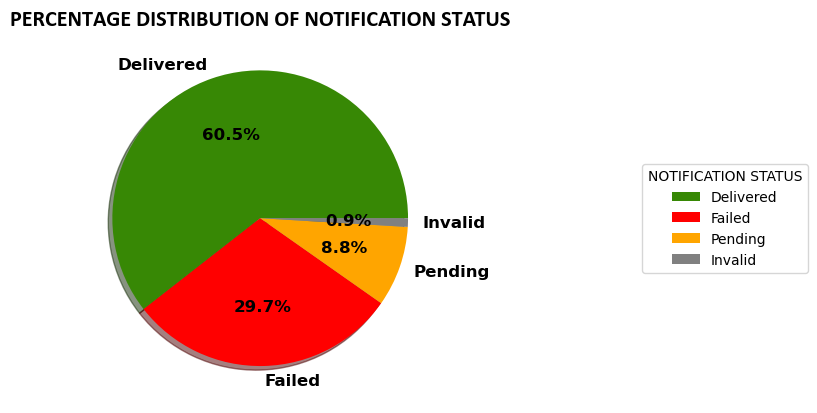

In [247]:
#plotting a pie chart to show the analysis

color =  ['#378805','#ff0000','#Ffa500', '#808080']

plt.pie(notif_status.values, labels = notif_status.index, shadow = True,
        colors = color, autopct = '%1.1f%%',
        textprops= {'fontsize': 12,'color': 'black', 'fontweight': 'bold'},
       startangle = 360)

plt.title('PERCENTAGE DISTRIBUTION OF NOTIFICATION STATUS', 
          fontdict  ={'fontname': 'calibri', 'fontweight': 'bold', 'fontsize': 16})

plt.legend(labels = notif_status.index, loc = 'right',
          bbox_to_anchor =(2, 0.5),
           title = 'NOTIFICATION STATUS')

plt.show()

- <h3> TELCO AVERAGE DELIVERY RESPONSE TIME

In [248]:
notif_data.head()

,Notification Status,Aggregator,Telco,VOLUME,Hour of day,Delivery Time_seconds
0,Failed,aggregator_1,globacom,1,5,1.216667
1,Failed,aggregator_1,globacom,1,9,3.350000
2,Failed,aggregator_1,MTN,1,10,2.716667
3,Failed,aggregator_1,MTN,1,16,2.016667
4,Failed,aggregator_1,MTN,1,20,2.766667


In [249]:
#Using the groupby function to group each telco by their delivery time and then getting the average using . mean()

telco_response = notif_data.groupby('Telco')['Delivery Time_seconds'].mean()


In [180]:
telco_response

Telco
9mobile      39.729316
Airtel      117.604018
MTN         559.214391
globacom     68.435529
Name: Delivery Time_seconds, dtype: float64

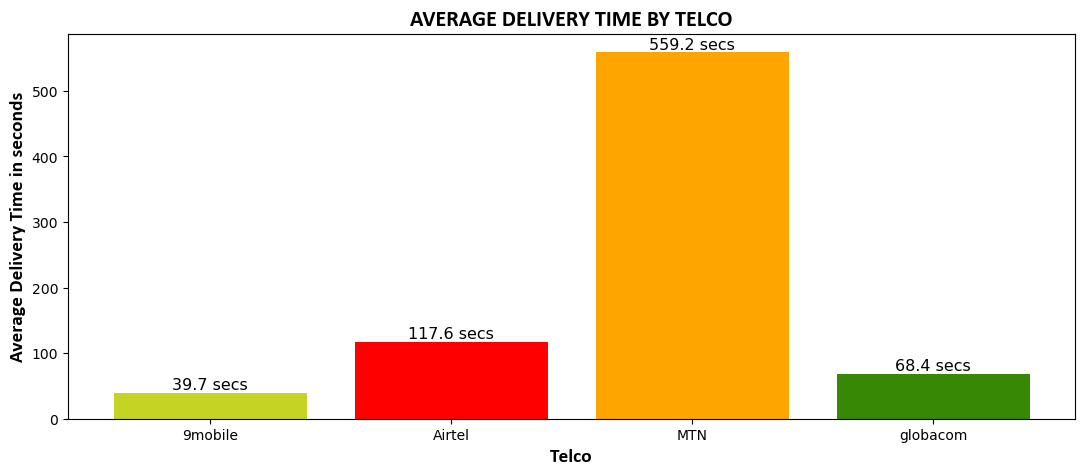

In [283]:
#plotting a bar chart to show analysis

fig = plt.figure(figsize = (13, 5))

color =  ['#c4d324','#ff0000','#Ffa500', '#378805']

plt.bar(telco_response.index, telco_response.values, color = color)

#using enumerate function to generate data labels on each of the bar
for i,v in enumerate(telco_response):
    plt.text(i,v, f'{v:.1f} secs', ha = 'center', va = 'bottom', fontsize = 11.5)
    

font = {'fontname': 'calibri', 'fontweight': 'bold', 'fontsize': 16}
plt.title('AVERAGE DELIVERY TIME BY TELCO', fontdict = font1)
plt.xlabel('Telco', fontdict = font2)
plt.ylabel('Average Delivery Time in seconds', fontdict = font2)
plt.show()


- <h3> What Hour of the day experiences the longest Delivery Time

In [186]:
#Grouping each hour of day by its average delivery time

x = notif_data.groupby('Hour of day')['Delivery Time_seconds'].mean()


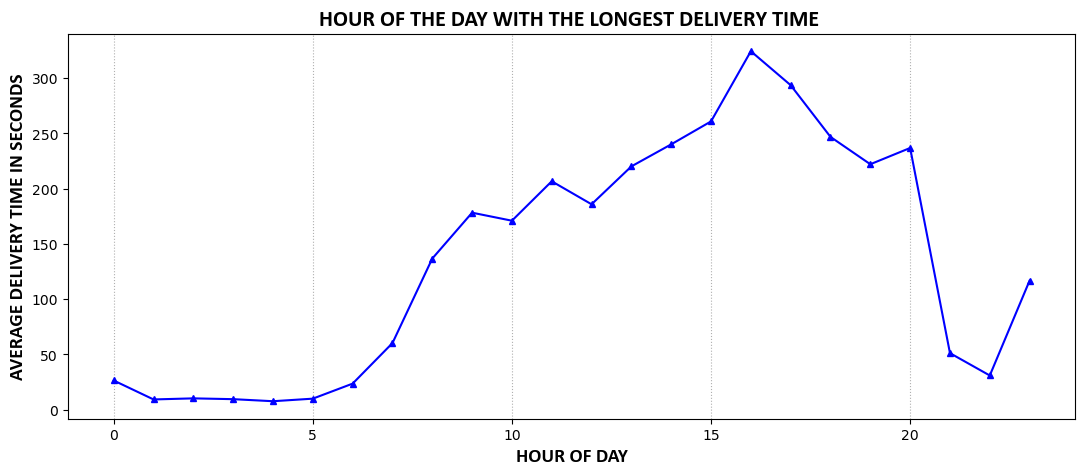

In [267]:
#Adjusting the figure size
fig = plt.figure(figsize = (13, 5))

#Creating a line plot
plt.plot(x.index, x.values, marker  = '^', color = 'BLUE', markersize =  5, ls = '-' )

plt.title('HOUR OF THE DAY WITH THE LONGEST DELIVERY TIME ', fontdict = font1)
plt.ylabel('AVERAGE DELIVERY TIME IN SECONDS', fontdict = font2)
plt.xlabel('HOUR OF DAY', fontdict = font2)
plt.grid(axis = 'x', ls = ':')
plt.show()

- <h3> During which hour of the day do we typically see positive notification statuses like 'Delivered',negative statuses like 'Failed' and 'Invalid' or a neutral status like 'Pending'

In [271]:
##Grouping each Notification Status by t he average hour of day


df = notif_data.groupby('Notification Status')['Hour of day'].mean()

df_sort = df.sort_values(ascending=False)

In [272]:
df

Notification Status
Delivered    12.035957
Failed       13.482899
Invalid      14.205128
Pending      10.769231
Name: Hour of day, dtype: float64

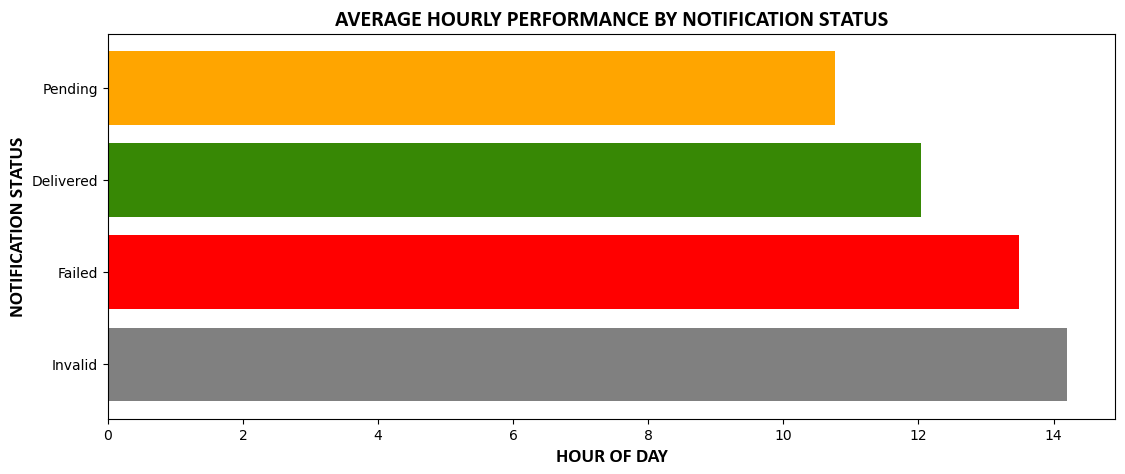

In [284]:
#adjusting the figure size

fig = plt.figure(figsize = (13, 5))

#plotting a horizontal bar chart

plt.barh(df_sort.index, df_sort.values, color = ['#808080','#ff0000','#378805','#Ffa500'])
plt.xlabel('HOUR OF DAY', fontdict = font2)
plt.ylabel('NOTIFICATION STATUS', fontdict = font2)
plt.title('AVERAGE HOURLY PERFORMANCE BY NOTIFICATION STATUS', fontdict = font1)

plt.show()

- <h3> What Telco generated more Volume

In [221]:
#Grouping each Telco by its average volume

telco_vol = notif_data.groupby('Telco')['VOLUME'].mean()

In [222]:
telco_vol

Telco
9mobile      50.332107
Airtel      156.410936
MTN         893.119143
globacom    102.594694
Name: VOLUME, dtype: float64

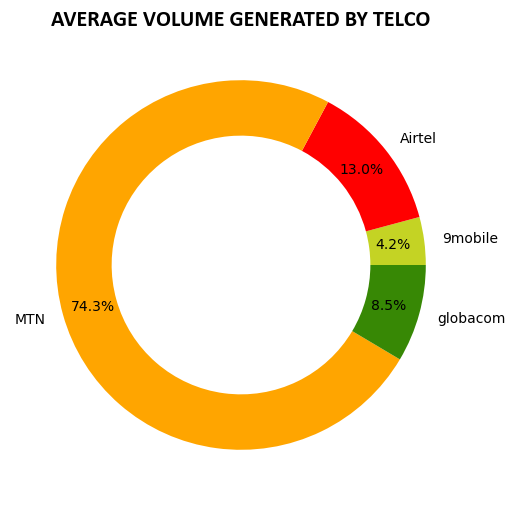

In [237]:
#Adjusting the figure size

fig = plt.figure(figsize = (12, 6))

color =  ['#c4d324','#ff0000','#Ffa500', '#378805']

#Creating the pie plot
plt.pie(telco_vol.values,labels = telco_vol.index, colors = color, 
        wedgeprops=dict(width=0.3), autopct = '%1.1f%%',
                pctdistance = 0.83)

font = {'fontname': 'calibri', 'fontweight': 'bold', 'fontsize': 16}
plt.title('AVERAGE VOLUME GENERATED BY TELCO', fontdict = font1)

plt.show()


- <h3> Most Used Telco

In [287]:
telco_count = notif_data['Telco'].value_counts()

In [288]:
telco_count

Airtel      1207
globacom    1093
9mobile     1087
MTN          747
Name: Telco, dtype: int64

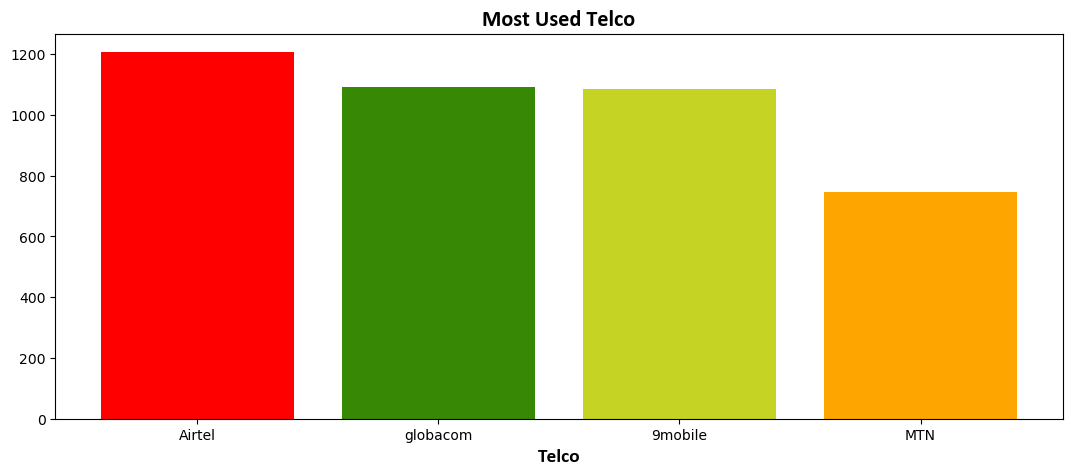

In [301]:
fig = plt.figure(figsize = (13, 5))

plt.bar(telco_count.index, telco_count.values, color =  ['#ff0000','#378805','#c4d324','#Ffa500'])

plt.title('Most Used Telco', fontdict = font1)
plt.xlabel('Telco',  fontdict = font2)


plt.show()